In [1]:
import pandas as pd
import seaborn as sns

In [2]:
products_cl = pd.read_csv('products_cl.csv')
orders_cl = pd.read_csv('orders_qu.csv')
orderlines_cl = pd.read_csv('orderlines_qu.csv')
brands_cl = pd.read_csv('brands_cl.csv')

In [3]:
ol_p_cl = orderlines_cl.merge(products_cl, how="inner", on="sku")

In [4]:
ol_p_cl["discount"] = products_cl["price"] - orderlines_cl["unit_price"]

In [5]:
ol_p_cl["discount_percent"] = (ol_p_cl["discount"] / orderlines_cl["unit_price"]) * 100

In [6]:
ol_p_cl["date"] = pd.to_datetime(ol_p_cl["date"])

In [7]:
ol_p_cl['revenue'] = orderlines_cl['unit_price'] * orderlines_cl['product_quantity']

In [8]:
ol_p_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discount,discount_percent,revenue
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,12.50,26.321331,47.49
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,40.01,210.689837,18.99
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,-13.19,-18.271229,72.19
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,-35.90,-58.949097,60.90
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,-107.50,-75.443891,142.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1647280,526003,0,1,NET0028,404.99,2018-03-12 15:59:19,Netgear Wifi Orbi System kit and satellite net...,System RBK50 Mesh WiFi network kit compact and...,429.99,0,1334,NaN,NaN,9.99
53227,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,NaN,NaN,19.98
53228,1647495,526093,0,1,WAC0252,83.99,2018-03-12 18:32:29,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,NaN,NaN,19.98
53229,1648399,526440,0,1,PAC2235,878.18,2018-03-13 15:08:27,Synology DS218 + NAS Server | 6GB RAM | 16TB (...,NAS storage server integrated with special foc...,1124.98,1,12175397,NaN,NaN,29.97


In [9]:
ol_p = ol_p_cl.copy()

In [10]:
ol_p.isna().any()

id                  False
id_order            False
product_id          False
product_quantity    False
sku                 False
unit_price          False
date                False
name                False
desc                False
price               False
in_stock            False
type                 True
discount             True
discount_percent     True
revenue             False
dtype: bool

In [11]:
ol_p = ol_p.loc[~ol_p.type.isna(), :]

In [12]:
ol_p = ol_p.loc[~ol_p.discount.isna(), :]

In [13]:
ol_p = ol_p.loc[~ol_p.discount_percent.isna(), :]

<AxesSubplot:xlabel='sku', ylabel='discount_percent'>

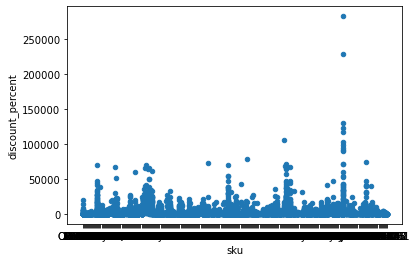

In [14]:
ol_p.plot.scatter(x = 'sku', y = 'discount_percent')

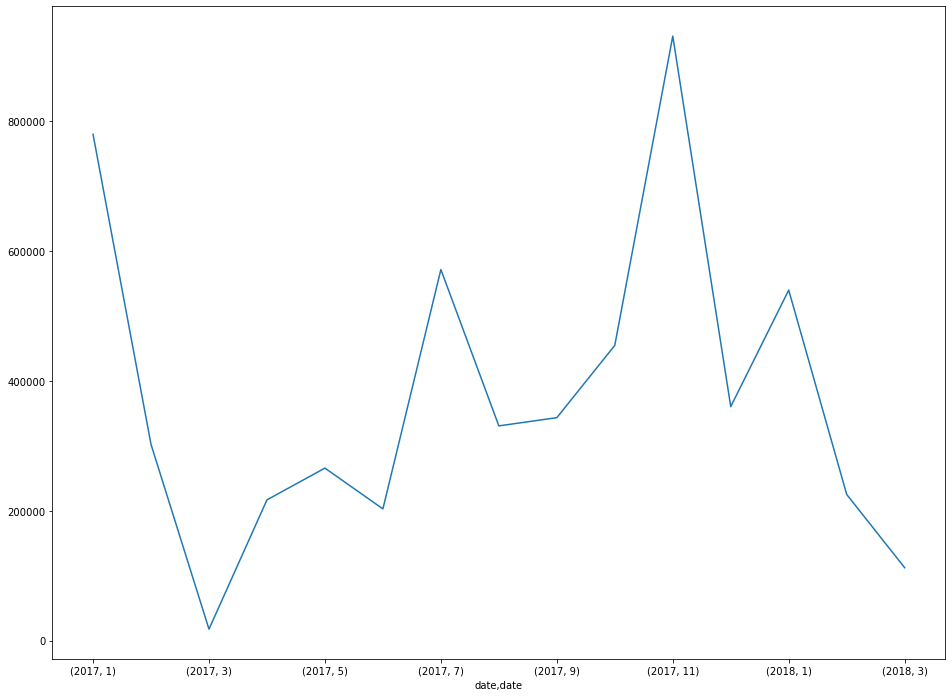

In [15]:
# year distribution of discounts
(
    ol_p.groupby([ol_p["date"].dt.year, 
                   ol_p["date"].dt.month])["discount"]
    .sum()
    .plot(figsize=(16, 12))
);

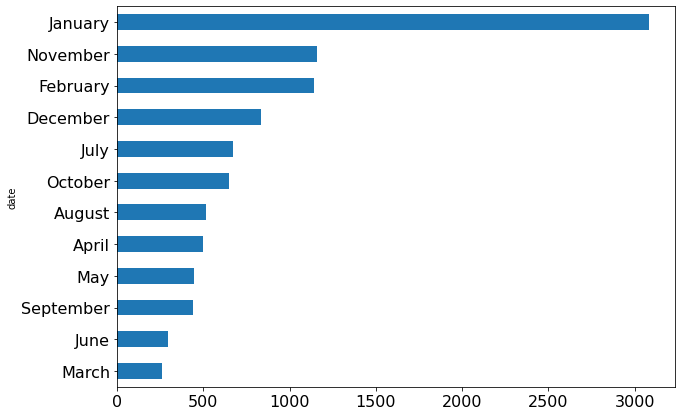

In [16]:
# month distribution of discounts
(
    ol_p
    .groupby(ol_p["date"].dt.month_name())["discount"]
    .count()
    .sort_values()
    .plot
    .barh(figsize=(10,7), fontsize=16)
);

In [17]:
# most discounted prodeucts ordered
ol_p["brand"] = ol_p["sku"].str[0:3]
ol_brands = ol_p.merge(brands_cl, how="left", left_on="brand", right_on="short")

(
    ol_brands
    .groupby("long")["discount"]
    .sum()
    .nlargest(10)
)

long
Apple      879791.04
Crucial    740918.48
Belkin     573111.08
Samsung    504476.36
OWC        501066.59
Philips    315092.27
SanDisk    231216.01
iFixit     167772.30
Pack       142599.47
Satechi    132850.34
Name: discount, dtype: float64

In [18]:
# most expensive products
(
    ol_brands
    .groupby("long")["price"]
    .sum()
    .nlargest(10)
)

long
Apple              225817.11
Samsung            102952.19
OWC                 94243.59
Western Digital     75687.67
LaCie               64264.67
Crucial             60795.63
Pack                50383.23
Wacom               47558.77
SanDisk             33784.07
Bose                31457.00
Name: price, dtype: float64

In [19]:
# most revenue peoducts
(
    ol_brands
    .groupby("long")["revenue"]
    .sum()
    .nlargest(10)
)

long
Apple              212765.51
OWC                 84750.22
Samsung             60056.77
SanDisk             57005.81
Wacom               54024.34
Western Digital     51917.24
Belkin              41987.47
Crucial             41431.90
iFixit              38287.09
LaCie               37322.53
Name: revenue, dtype: float64

In [20]:
# most ordered products
(
    ol_brands
    .groupby("long")["id_order"]
    .count()
    .nlargest(10)
)

long
Apple              2034
OWC                 737
Samsung             581
Western Digital     511
SanDisk             493
Crucial             401
Wacom               394
LaCie               350
iFixit              316
Belkin              304
Name: id_order, dtype: int64

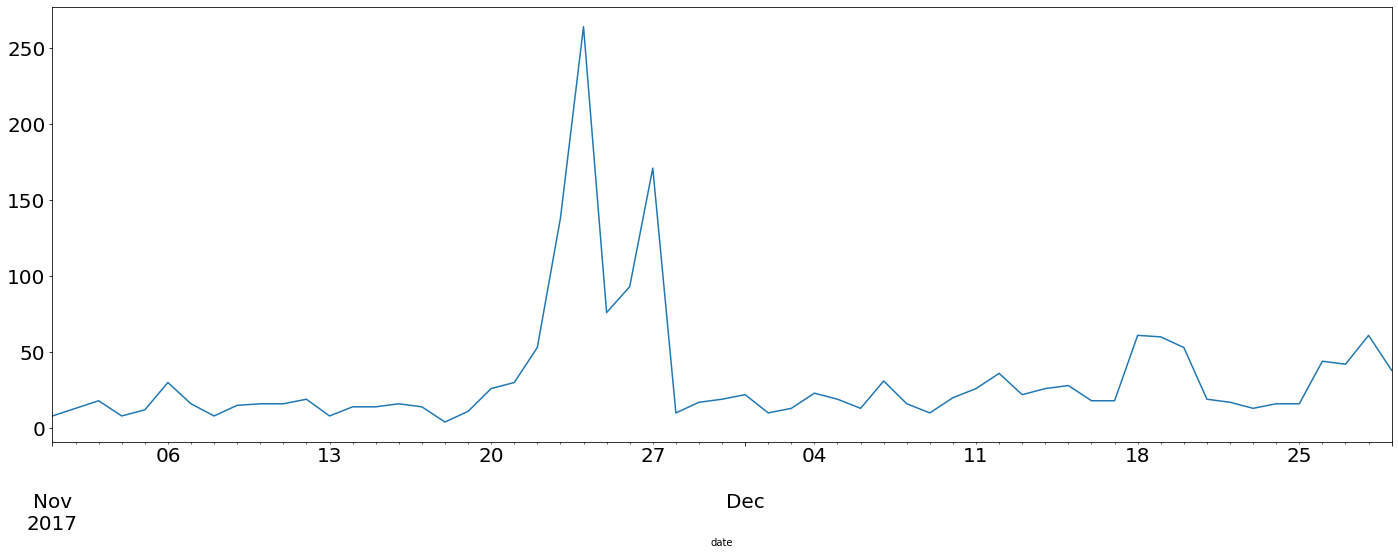

In [21]:
# discounts between nov-dec 2017
nov_dec_2017 = ol_p.loc[ol_p["date"].between("2017-11-01", "2017-12-30"), :]

(
    nov_dec_2017
    .resample("D", on="date")["discount"]
    .count()
    .plot(figsize=(24, 8), fontsize=20)
);

In [22]:
ol_brands['nov_dec_2017'] = ol_brands["date"].between("2017-11-01", "2017-12-30")

<AxesSubplot:xlabel='discount', ylabel='short'>

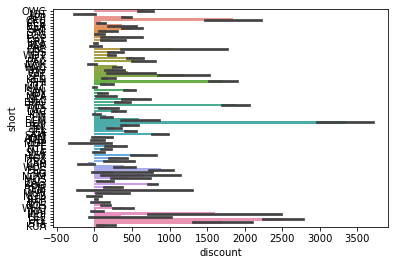

In [23]:
# 
(
    ol_brands
    .groupby([ol_brands["long"], ol_brands["nov_dec_2017"]])["discount"]
    .mean()
    .reset_index()
    .sort_values('nov_dec_2017')
    
)

sns.barplot(data=ol_brands,
            y='short',
            x='discount')

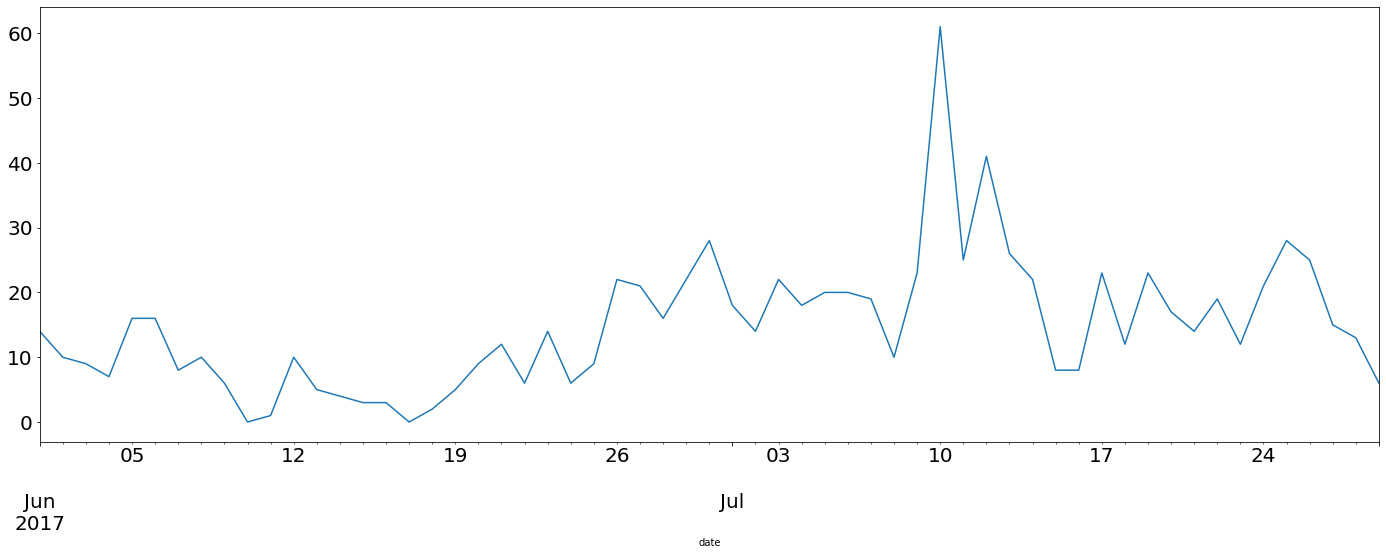

In [24]:
# discounts between june and july 2017
july_2017 = ol_p.loc[ol_p["date"].between("2017-06-01", "2017-07-30"), :]

(
    july_2017
    .resample("D", on="date")["discount"]
    .count()
    .plot(figsize=(24, 8), fontsize=20)
);

In [25]:
product_category_df = ol_brands.copy()

In [26]:
product_category_df['category'] = ''

In [27]:
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("keyboard"), "category"] += ", keyboard"
product_category_df.loc[product_category_df["name"].str.lower().str.contains("^.{0,7}apple iphone"), "category"] += ", smartphone"
product_category_df.loc[product_category_df["name"].str.lower().str.contains("^.{0,7}apple ipod"), "category"] += ", ipod"
product_category_df.loc[product_category_df["name"].str.lower().str.contains("^.{0,7}apple ipad|tablet"), "category"] += ", tablet"
product_category_df.loc[product_category_df["name"].str.lower().str.contains("imac|mac mini|mac pro"), "category"] += ", desktop"
product_category_df.loc[product_category_df["name"].str.lower().str.contains("macbook"), "category"] += ", laptop"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("backpack"), "category"] += ", backpack"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("case|funda|housing|casing|folder"), "category"] += ", case"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("dock|hub|connection|expansion box"), "category"] += ", dock"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("cable|connector|lightning to usb|wall socket|power strip"), "category"] += ", cable"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("flash drive|hard drive|pendrive|hard disk|memory|storage|^ssd|^hardssd|modules|ssd expansion"), "category"] = ", storage"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("battery"), "category"] += ", battery"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("headset|headphones"), "category"] += ", headset"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("charger"), "category"] += ", charger"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("mouse|trackpad"), "category"] += ", mouse"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("stand|support"), "category"] += ", stand"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("strap|armband|belt|bracelet"), "category"] += ", strap"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("^.{0,6}apple watch|smartwatch|smart watch"), "category"] += ", smartwatch"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("adapter"), "category"] += ", adapter"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("^.{0,7}ram"), "category"] += ", ram"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("protect|cover|sleeve|screensaver|shell"), "category"] += ", protection"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("nas|server|raid|synology"), "category"] += ", server"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("scale"), "category"] += ", scale"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("thermometer"), "category"] += ", thermometer"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("monitor"), "category"] += ", monitor"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("speaker|music system"), "category"] += ", speaker"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("camera"), "category"] += ", camera"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("pointer"), "category"] += ", pointer"
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("refurbished|reconditioned|like new"), "category"] += ", refurbished"

In [28]:
product_category_df["category"] = product_category_df["category"].str[2:]

In [29]:
# most discounted category
(
    product_category_df
    .groupby("category")["discount"]
    .sum()
    .nlargest(10)
)

category
storage                 1202152.03
ram                     1097368.00
                         813999.75
dock, charger, stand     528194.32
mouse                    360994.64
storage, server          131978.97
cable                    128887.51
headset                  128061.58
desktop                  124599.85
battery                  109895.63
Name: discount, dtype: float64

In [30]:
# most expensive category
(
    product_category_df
    .groupby("category")["unit_price"]
    .sum()
    .nlargest(10)
)

category
storage            261069.00
smartphone         107638.58
ram                 88685.94
                    70319.88
storage, server     64695.09
headset             33411.42
tablet              30230.64
server              27081.49
monitor             25536.36
desktop             25345.71
Name: unit_price, dtype: float64

In [31]:
# most revenue peoducts
(
    product_category_df
    .groupby("category")["revenue"]
    .sum()
    .nlargest(10)
)

category
storage            263751.89
                   122473.37
ram                 84186.95
cable               77848.77
headset             51135.05
storage, server     47126.23
adapter             39706.42
tablet              36265.66
protection          33869.77
battery             30273.60
Name: revenue, dtype: float64

In [32]:
# most ordered products
(
    product_category_df
    .groupby("category")["id_order"]
    .count()
    .nlargest(10)
)

category
storage            2347
                   1144
ram                 794
cable               712
headset             513
storage, server     469
adapter             357
protection          289
tablet              283
battery             257
Name: id_order, dtype: int64

In [33]:
category_types = ol_brands.copy()

In [34]:
category_types['category'] = ''

In [35]:
category_types.groupby("type").count().nlargest(10, "sku")

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,discount,discount_percent,revenue,brand,short,long,nov_dec_2017,category
type,,,,,,,,,,,,,,,,,,,
1364,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816
1230,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807,807
12655397,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764
12215397,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690
11905404,656,656,656,656,656,656,656,656,656,656,656,656,656,656,656,654,654,656,656
11935397,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588
5384,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573
42945397,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561
12755395,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525


In [38]:
category_types.loc[category_types["type"] == "1364", :].sample(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discount,discount_percent,revenue,brand,short,long,nov_dec_2017,category
7653,1503235,465972,0,1,OWC0036-2,92.99,2017-12-18 18:21:39,Mac memory OWC 8GB (2x4GB) SO-DIMM DDR3 1333MHZ,RAM 8GB (2x4GB) Mac mini (2011) iMac (2010-201...,93.98,1,1364,78.70,27.800346,283.09,OWC,OWC,OWC,True,
4092,1592055,502794,0,1,CRU0016-2,106.99,2018-01-31 12:43:11,Crucial memory Mac 8GB (2x4GB) SO-DIMM DDR3 10...,RAM 8GB (2x4GB) Mac mini iMac MacBook and MacB...,107.98,1,1364,-35.09,-41.287210,84.99,CRU,CRU,Crucial,False,
4035,1322828,390829,0,1,CRU0016-2,87.99,2017-08-23 02:03:33,Crucial memory Mac 8GB (2x4GB) SO-DIMM DDR3 10...,RAM 8GB (2x4GB) Mac mini iMac MacBook and MacB...,107.98,1,1364,-749.00,-88.640102,844.99,CRU,CRU,Crucial,False,
4078,1516193,472065,0,1,CRU0016-2,95.99,2017-12-26 12:19:53,Crucial memory Mac 8GB (2x4GB) SO-DIMM DDR3 10...,RAM 8GB (2x4GB) Mac mini iMac MacBook and MacB...,107.98,1,1364,-10.00,-50.025013,19.99,CRU,CRU,Crucial,True,
6251,1138472,306223,0,1,FCM0016-2,68.99,2017-01-10 01:31:44,Mac memory FCM 8GB (2x4GB) SO-DIMM DDR3 1333MHz,8GB RAM iMac (2010/11) Mac mini (2011) and Mac...,78.00,0,1364,-140.00,-87.505469,159.99,FCM,FCM,FCM,False,
7577,1325383,393044,0,1,OWC0036-2,76.99,2017-08-27 13:34:41,Mac memory OWC 8GB (2x4GB) SO-DIMM DDR3 1333MHZ,RAM 8GB (2x4GB) Mac mini (2011) iMac (2010-201...,93.98,1,1364,1765.01,1877.869986,93.99,OWC,OWC,OWC,False,
4066,1465040,450921,0,1,CRU0016-2,106.99,2017-11-28 21:39:10,Crucial memory Mac 8GB (2x4GB) SO-DIMM DDR3 10...,RAM 8GB (2x4GB) Mac mini iMac MacBook and MacB...,107.98,1,1364,-75.99,-62.806844,120.99,CRU,CRU,Crucial,True,
7591,1366176,406711,0,1,OWC0036-2,78.84,2017-09-30 16:48:52,Mac memory OWC 8GB (2x4GB) SO-DIMM DDR3 1333MHZ,RAM 8GB (2x4GB) Mac mini (2011) iMac (2010-201...,93.98,1,1364,190.59,385.887832,49.39,OWC,OWC,OWC,False,
7553,1170818,318655,0,1,OWC0036-2,87.99,2017-02-03 19:13:10,Mac memory OWC 8GB (2x4GB) SO-DIMM DDR3 1333MHZ,RAM 8GB (2x4GB) Mac mini (2011) iMac (2010-201...,93.98,1,1364,1526.71,370.300032,412.29,OWC,OWC,OWC,False,
4049,1380220,406211,0,1,CRU0016-2,96.99,2017-10-17 17:37:44,Crucial memory Mac 8GB (2x4GB) SO-DIMM DDR3 10...,RAM 8GB (2x4GB) Mac mini iMac MacBook and MacB...,107.98,1,1364,69.01,690.790791,9.99,CRU,CRU,Crucial,False,


In [40]:
category_types.loc[category_types["type"] == "11865403", "category"] += " Phone Cases"

In [42]:
category_types.loc[category_types["type"] == "12175397", "category"] += " Servers"
category_types.loc[category_types["type"] == "11905404", "category"] += " Cables"
category_types.loc[category_types["type"] == "1364", "category"] += " RAM Storage"
category_types.loc[category_types["type"] == "5384", "category"] += " Headset"
category_types.loc[category_types["type"] == "12215397", "category"] += " ROM Storage"
category_types.loc[category_types["type"] == "12655397", "category"] += " Hard Drive"
category_types.loc[category_types["type"] == "12585395", "category"] += " Adapter"
category_types.loc[category_types["type"] == "1296", "category"] += " HD Monitors"
category_types.loc[category_types["type"] == "1230", "category"] += " Lightning Cables"

In [43]:
category_types.category.value_counts()

                     5047
 RAM Storage          816
 Lightning Cables     807
 Hard Drive           764
 ROM Storage          690
 Cables               656
 Headset              573
 Phone Cases          417
 Servers               85
 Adapter               68
 HD Monitors           67
Name: category, dtype: int64

In [44]:
# most discounted category
(
    category_types
    .groupby("category")["discount"]
    .mean()
    .nlargest(11)
)

category
 RAM Storage         1395.460662
 Servers              840.290941
 Cables               836.599512
 ROM Storage          737.762087
 HD Monitors          559.870000
                      519.635750
 Adapter              489.675147
 Hard Drive           297.137029
 Lightning Cables     275.071797
 Headset              272.979319
 Phone Cases          218.531151
Name: discount, dtype: float64

In [45]:
# average discount percentage
# most discounted category
(
    category_types
    .groupby("category")["discount_percent"]
    .mean()
    .nlargest(11)
)

category
 RAM Storage         4753.674357
 Servers             4222.448736
 Cables              3419.930688
 ROM Storage         2709.225477
 HD Monitors         2648.914960
 Adapter             2088.931365
                     1893.375590
 Headset             1363.367278
 Lightning Cables    1218.987943
 Hard Drive          1084.891797
 Phone Cases          888.470973
Name: discount_percent, dtype: float64

In [46]:
# most expensive category
(
    category_types
    .groupby("category")["unit_price"]
    .sum()
    .nlargest(11)
)

category
                     453669.35
 ROM Storage         113709.42
 RAM Storage          92922.72
 Hard Drive           81972.00
 Cables               40558.12
 Headset              37210.58
 Servers              29448.89
 HD Monitors          26549.72
 Phone Cases          11246.46
 Lightning Cables      8206.53
 Adapter               4810.37
Name: unit_price, dtype: float64

In [47]:
# most revenue peoducts
(
    category_types
    .groupby("category")["revenue"]
    .sum()
    .nlargest(11)
)

category
                     579859.36
 Lightning Cables     88417.84
 RAM Storage          85409.87
 Hard Drive           80569.00
 ROM Storage          75761.84
 Cables               59531.88
 Headset              56853.12
 Phone Cases          43206.38
 Adapter               9346.01
 HD Monitors           7999.21
 Servers               6121.11
Name: revenue, dtype: float64

In [48]:
# most ordered products
(
    category_types
    .groupby("category")["id_order"]
    .count()
    .nlargest(10)
)

category
                     5047
 RAM Storage          816
 Lightning Cables     807
 Hard Drive           764
 ROM Storage          690
 Cables               656
 Headset              573
 Phone Cases          417
 Servers               85
 Adapter               68
Name: id_order, dtype: int64

In [49]:
# discounts between nov-dec 2017
nov_dec_2017 = category_types.loc[category_types["date"].between("2017-11-01", "2017-12-30"), :]

(
    nov_dec_2017
    .groupby("category")["id_order"]
    .count()
    .nlargest(10)
)

category
                     1026
 Hard Drive           205
 RAM Storage          148
 Headset              145
 Cables               116
 Lightning Cables     108
 ROM Storage          102
 Phone Cases           72
 Adapter               16
 Servers                8
Name: id_order, dtype: int64

In [50]:
# most discount average between nov-dec
(
    nov_dec_2017
    .groupby("category")["discount"]
    .mean()
    .nlargest(11)
)

category
 RAM Storage         2329.529932
 Servers             1608.007500
 Cables               845.647414
                      607.088655
 ROM Storage          488.694118
 Hard Drive           396.415073
 HD Monitors          319.980000
 Lightning Cables     246.408056
 Headset              227.943793
 Phone Cases          153.948472
 Adapter              -71.200000
Name: discount, dtype: float64

In [52]:
# discounts between june and july 2017
#july_2017 = category_types.loc[ol_p["date"].between("2017-06-01", "2017-07-30"), :]

# (
   # july_2017
    #.groupby("category")["id_order"]
    #.count()
    #.nlargest(10)
#)

In [53]:
category_types = category_types.merge(orders_cl, how="inner", left_on="id_order", right_on='order_id')

In [54]:
category_types["price_without_shipping"] = category_types["product_quantity"] * category_types["price"]

In [60]:
category_types.head(5)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,...,long,nov_dec_2017,category,order_id,created_date,total_paid,state,price_without_shipping,shippind_difference,shipping_difference
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,...,OWC,False,,299545,2017-01-01 01:51:47,51.48,Completed,60.99,-9.51,-9.51
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,...,OWC,False,,299404,2017-01-01 22:59:31,415.11,Completed,60.99,354.12,354.12
2,1120180,299404,0,1,NTE0013,18.99,2017-01-01 22:50:25,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",Adapter HDD / SSD 2.5 SATA 3.5 compatible with...,26.99,...,NewerTech,False,,299404,2017-01-01 22:59:31,415.11,Completed,26.99,388.12,388.12
3,1120183,299404,0,1,SAM0075,310.64,2017-01-01 22:51:36,Samsung 850 EVO SSD Disk 1TB,SSD hard drive Mac and PC 25 inch 1TB SATA III...,389.99,...,Samsung,False,ROM Storage,299404,2017-01-01 22:59:31,415.11,Completed,389.99,25.12,25.12
4,1120191,299404,0,1,KIN0156,37.99,2017-01-01 22:55:53,Mac memory Kingston 4GB SO-DIMM DDR3åÊ1333MhzåÊ,4GB RAM iMac (2011) Mac mini and MacBook Pro (...,35.53,...,Kingston,False,RAM Storage,299404,2017-01-01 22:59:31,415.11,Completed,35.53,379.58,379.58


In [59]:
category_types['shipping_difference'] = category_types['total_paid'] - category_types['price_without_shipping']

<AxesSubplot:xlabel='shipping_difference', ylabel='Count'>

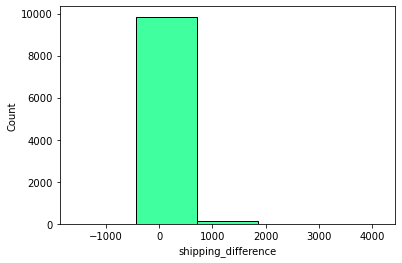

In [71]:
sns.histplot(data=category_types, x="shipping_difference", bins=5, color='springgreen')

In [57]:
category_types

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,...,brand,short,long,nov_dec_2017,category,order_id,created_date,total_paid,state,price_without_shipping
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,...,OWC,OWC,OWC,False,,299545,2017-01-01 01:51:47,51.48,Completed,60.99
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,...,OWC,OWC,OWC,False,,299404,2017-01-01 22:59:31,415.11,Completed,60.99
2,1120180,299404,0,1,NTE0013,18.99,2017-01-01 22:50:25,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",Adapter HDD / SSD 2.5 SATA 3.5 compatible with...,26.99,...,NTE,NTE,NewerTech,False,,299404,2017-01-01 22:59:31,415.11,Completed,26.99
3,1120183,299404,0,1,SAM0075,310.64,2017-01-01 22:51:36,Samsung 850 EVO SSD Disk 1TB,SSD hard drive Mac and PC 25 inch 1TB SATA III...,389.99,...,SAM,SAM,Samsung,False,ROM Storage,299404,2017-01-01 22:59:31,415.11,Completed,389.99
4,1120191,299404,0,1,KIN0156,37.99,2017-01-01 22:55:53,Mac memory Kingston 4GB SO-DIMM DDR3åÊ1333MhzåÊ,4GB RAM iMac (2011) Mac mini and MacBook Pro (...,35.53,...,KIN,KIN,Kingston,False,RAM Storage,299404,2017-01-01 22:59:31,415.11,Completed,35.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,1140732,307157,0,1,CRU0051,144.99,2017-01-11 11:21:47,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,...,CRU,CRU,Crucial,False,ROM Storage,307157,2017-01-11 11:29:22,149.98,Completed,158.66
9986,1143329,308247,0,1,CRU0051,144.99,2017-01-12 21:06:50,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,...,CRU,CRU,Crucial,False,ROM Storage,308247,2017-01-12 21:14:28,149.98,Completed,158.66
9987,1145728,309280,0,1,CRU0051,144.99,2017-01-14 11:33:44,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,...,CRU,CRU,Crucial,False,ROM Storage,309280,2017-01-14 11:40:12,149.98,Completed,158.66
9988,1158791,314639,0,1,CRU0051,149.99,2017-01-25 11:09:05,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,...,CRU,CRU,Crucial,False,ROM Storage,314639,2017-01-25 11:11:30,156.98,Completed,158.66
